# Monte Carlo Simulation in Python:
## Or Exposing Kids to Computational Thinking (as early and often as possible)
***
<ul>
    <li>Pat Crouse</li>
    <li>8/21/2018</li>
    <li>Code availabe at: https://github.com/pjcrouse/estimate_pi</li>
</ul>
***

<h2>Background/Geometry:</h2>
<img src="images/pi_est_geometry.jpg" alt="Image not found" style="float:left;width:747px;height:347px;">

<table>
    <tr>
        <td style="text-align:left;font-size:large;">Ali and Xander at High Elevation:</td>
        <td style="text-align:left;font-size:large;">Linc and Xander at High Elevation:</td>
        <td style="text-align:left;font-size:large;">Ali and Xander at Low Elevation:</td>
        <td style="text-align:left;font-size:large;">Pi Estimate:</td>  
    </tr>
    <tr>
        <td>
            <img src="images/ali_xander_treehouse.jpg" alt="Image not found" style="float:left;width:250px;height:250px;">
        </td>
        <td>
            <img src="images/linc_xander_treehouse.jpg" alt="Image not found" style="float:left;width:250px;height:250px;">
        </td>        
        <td>
            <img src="images/ali_xander_ground.jpg" alt="Image not found" style="float:left;width:250px;height:250px;">
        </td>
        <td>
            <img src="images/pi_est.jpg" alt="Image not found" style="float:left;width:250px;height:250px;">
        </td>
    </tr>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# set seed for reproducible results
np.random.seed(5)

In [2]:
# results of experiments run 5 times with varying number of iterations:
exp_results = {
               'x': [1,4,18,70,126],
               'y': [4,2,3.78,2.8,3.45]
              }

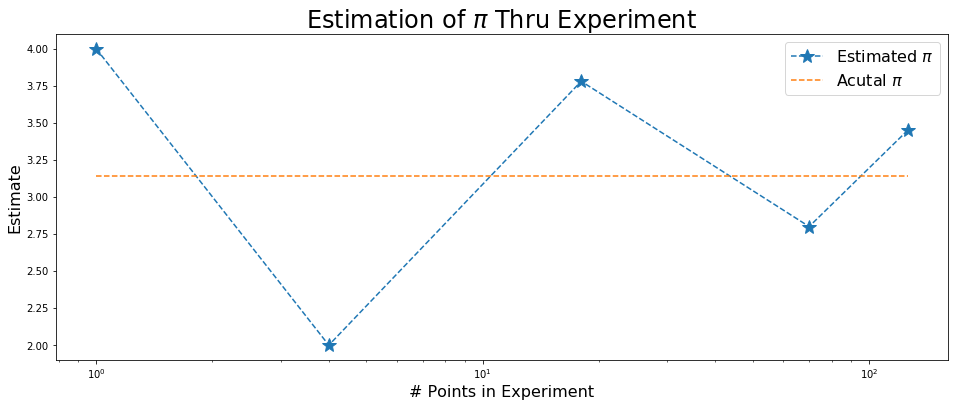

In [3]:
# setup & create plot
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
pi = np.ones_like(exp_results['x'])*np.pi
plt.plot(exp_results['x'], exp_results['y'], linestyle='dashed', marker='*', markersize=15, 
         label='Estimated $\pi$')
plt.plot(exp_results['x'], pi, linestyle='dashed', label='Acutal $\pi$')

# style the plot
plt.xscale('log')
plt.legend(prop={'size': 16})
plt.xlabel('# Points in Experiment', fontsize=16)
plt.ylabel('Estimate', fontsize=16)
plt.title('Estimation of $\pi$ Thru Experiment', fontsize=24)

# show the plot
plt.show()

In [4]:
def est_pi(size=1000):
    """
    Generates an estimate of pi along with additional details.
    
    In addition to estimate of pi, the function returns an array of points used in the estimation,
    and a boolean array indicating whether the point falls inside the unit cirlce as a 3 element 
    tuple. Both returned arrays contain 'size' (detault=1000) elements.
    
    Parameters:
    -----------
    size : int, optional
        The number of points used in the simulation (default is 1000).     
    """
    pts = np.random.uniform(-1,1,size=(size, 2))
    inside = pts[:,0]**2 + pts[:,1]**2 < 1
    pi = round(float(sum(inside)) / size * 4, 10)     
    return pi, pts, inside

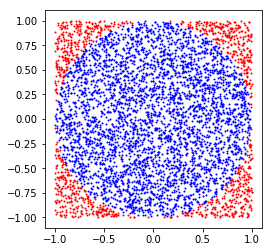

In [5]:
# run estimation with 5000 points and get the pts/inside arrays
_, pts, inside = est_pi(5000)

# plot the points
plt.scatter(pts[inside][:,0], pts[inside][:,1], color='blue', s=1)
plt.scatter(pts[~inside][:,0], pts[~inside][:,1], color='red', s=1)

# set reasonable margis, ensure properly scaled aspect ratio and show plot
plt.margins(.05)
plt.gca().set_aspect('equal')
plt.show()

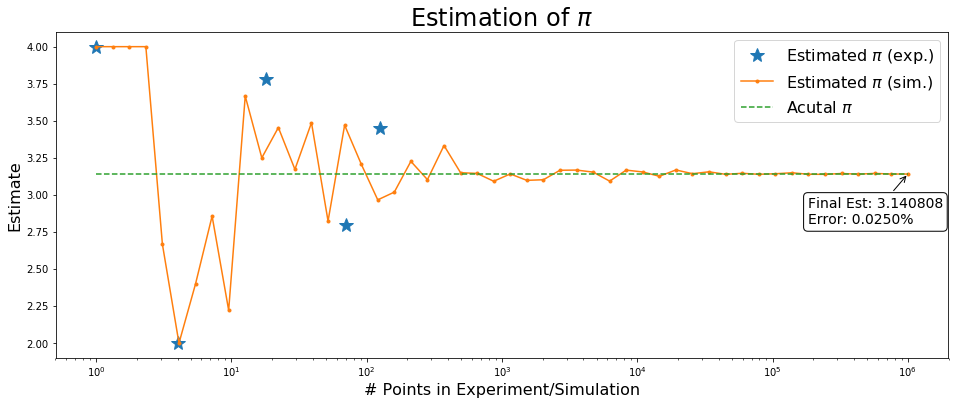

In [6]:
# setup simulation with various input sizes
sizes = np.logspace(0,6,50)
x = []
y = []
for size in sizes:
    pi = est_pi(int(size))[0]
    x.append(size)
    y.append(pi)

# setup & create plot
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
pi = np.ones_like(x)*np.pi
plt.plot(exp_results['x'], exp_results['y'], linestyle='None', marker='*', markersize=15, label='Estimated $\pi$ (exp.)')
plt.plot(x,y, linestyle='solid', marker='.', label='Estimated $\pi$ (sim.)')
plt.plot(x, pi, linestyle='dashed', label='Acutal $\pi$')

# style the plot
plt.xscale('log')
plt.legend(prop={'size': 16})
plt.xlabel('# Points in Experiment/Simulation', fontsize=16)
plt.ylabel('Estimate', fontsize=16)
plt.title('Estimation of $\pi$', fontsize=24)

# label the last point
final_est = (x[-1], y[-1])
ax.annotate(f'Final Est: {final_est[1]}\nError: {np.abs(np.pi-final_est[1])/np.pi*100:.4f}%',
            xy=final_est, xycoords='data', xytext=(-100,-50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->"), bbox=dict(boxstyle="round", fc="w"), size=14)

# show the plot
plt.show()

<h1>Other resources:</h1>
<ul>
    <li>https://www.exploratorium.edu/snacks/pi-toss</li>
    <li>https://pythonprogramming.net/monte-carlo-simulator-python/</li>
</ul>